In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
pip install imbalanced-learn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Load the dataset
df = pd.read_csv('creditcard-dataset.csv') 
# Display the first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
# Check for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


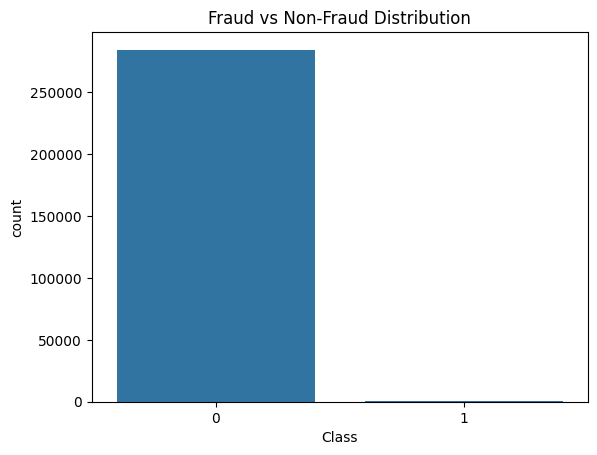

In [12]:
# Count the number of fraudulent (1) and non-fraudulent (0) transactions
print(df['Class'].value_counts())

# Visualize the distribution
sns.countplot(x=df['Class'])
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


In [13]:
from imblearn.over_sampling import SMOTE
# Assuming 'df' is your DataFrame containing the data
# Separate features (X) and target (y)
X = df.drop('Class', axis=1) # Features (all columns except 'Class')
y = df['Class']	# Target variable ('Class' column) 8
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data, 80% for training 11
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) 
# Check the new class distribution
print("Class Distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class Distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [16]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 
# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test) 
# Print results
print("Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf)) 


Model Accuracy: 0.9995259997893332

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56852    12]
 [   15    83]]


In [17]:
import joblib

# Save the model
joblib.dump(rf_classifier, "credit_card_fraud_model.pkl")

# Load the model later
rf_loaded = joblib.load("credit_card_fraud_model.pkl") 

# Example: Predict fraud for new transactions
new_predictions = rf_classifier.predict(X_test[:5])
print(new_predictions) # 0 = Not Fraud, 1 = Fraud 


[1 0 0 0 0]


In [19]:
# Predict fraud on test data
y_pred_rf = rf_classifier.predict(X_test) 
# Show first 10 predictions
print("Predicted Fraud Labels:", y_pred_rf[:10]) # 0 = Not Fraud, 1 = Fraud 


Predicted Fraud Labels: [1 0 0 0 0 0 0 0 0 0]


In [15]:
pip install -U ipykernel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
